# Importing usefull libraries and scripts

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from IPython.display import display

import warnings

warnings.filterwarnings('ignore')

sys.path.append('..')

In [2]:
from scripts import dataframe as dfr
from scripts import matrix as mx
from scripts import regression as rgr

# Downloading the data

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [4]:
# !wget $data

# Reading and refining the data frame

In [5]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df = dfr.data_frame_refining(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


# Data preparation

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df = df.fillna(0)

In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [12]:
freq_ocean_proximity = df['ocean_proximity'].mode()
freq_ocean_proximity[0]

'<1h_ocean'

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [13]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [14]:
total_columns = list(df.columns)
total_columns.remove('ocean_proximity')
numerical_cols = total_columns.copy()
total_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

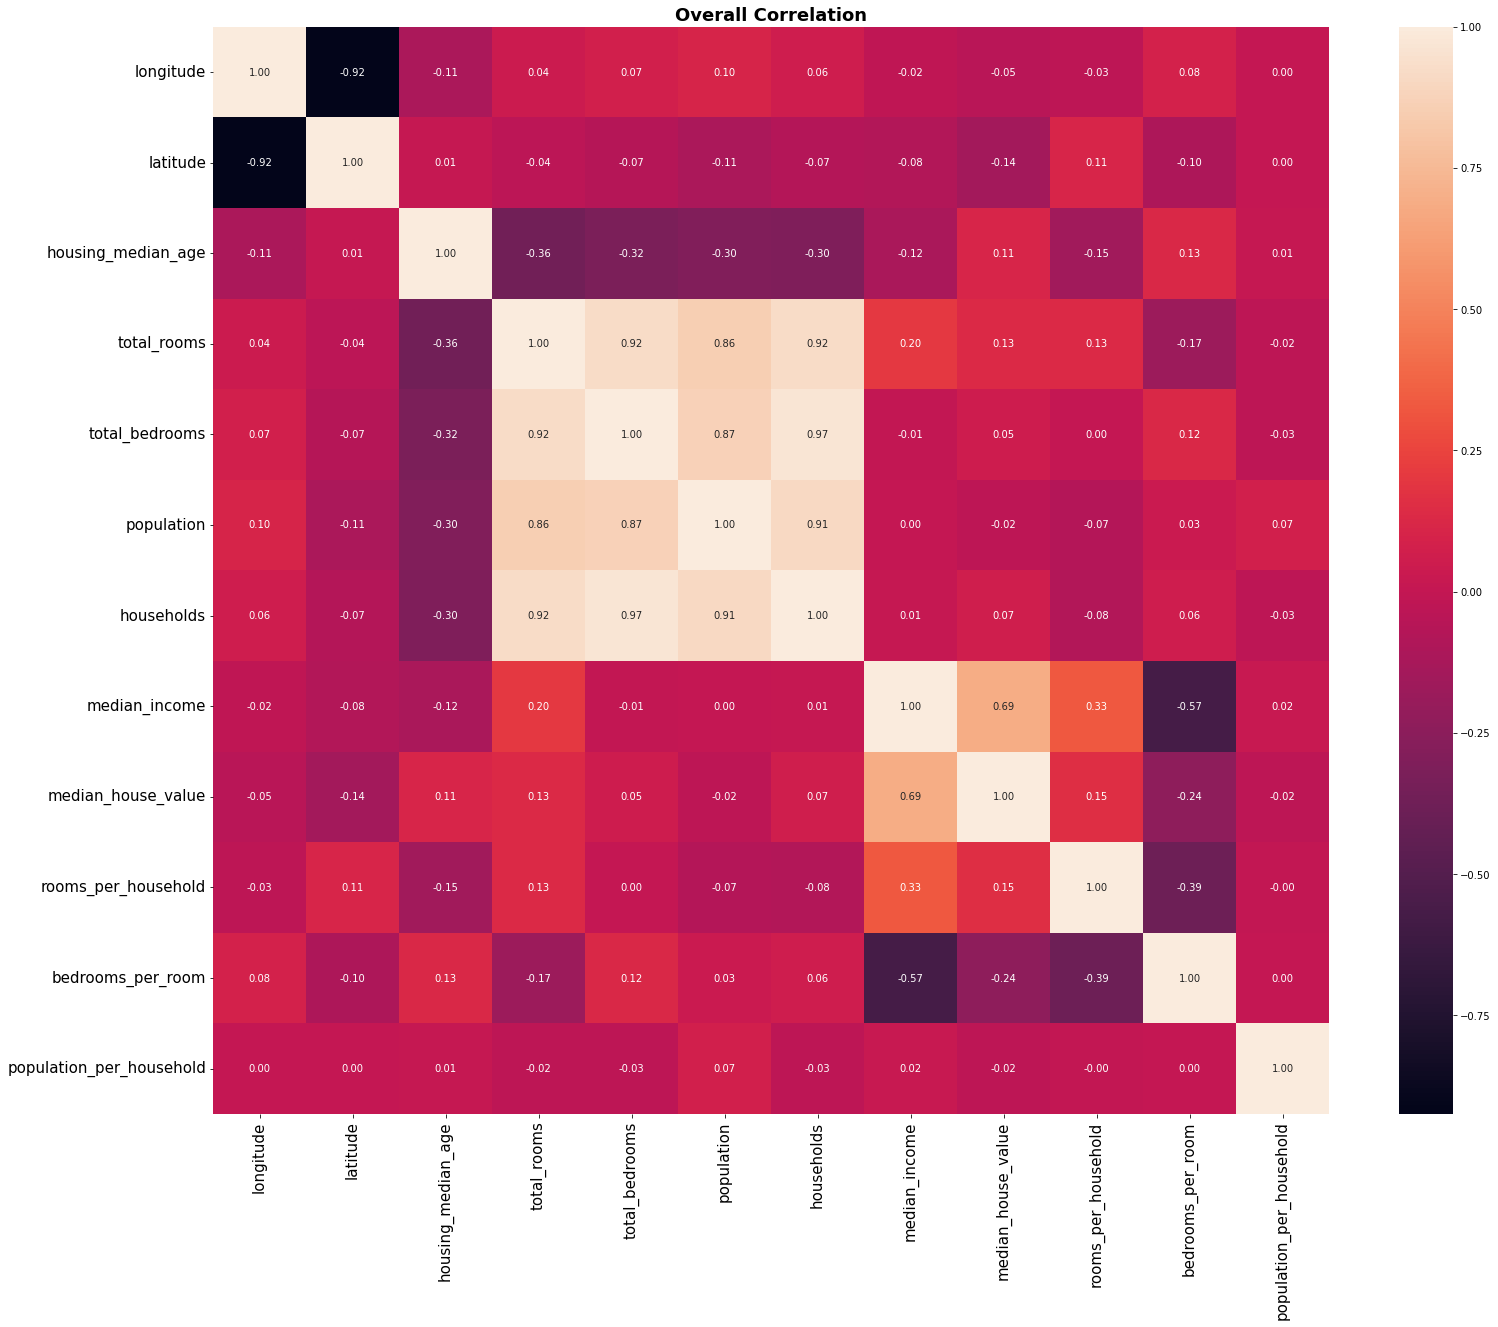

In [15]:
dfr.corr_matrix(df[numerical_cols],'Overall Correlation', 'overall_corr.jpg')

In [16]:
print(df[['total_bedrooms','population']].corrwith(df['households']))

total_bedrooms    0.966507
population        0.907222
dtype: float64


In [17]:
print(df[['total_bedrooms','population_per_household']].corrwith(df['total_rooms']))

total_bedrooms              0.920196
population_per_household   -0.024581
dtype: float64


### Make median_house_value binary

In [18]:
mean = df.median_house_value.mean()
mean

206855.81690891474

In [19]:
df['above_avg'] = (df.median_house_value > mean).astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_avg
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467,1


### Split the data

In [20]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

In [21]:
y_train = df_train.above_avg
y_val = df_val.above_avg
y_test = df_test.above_avg

In [22]:
del df_train['median_house_value']
del df_train['above_avg']
del df_val['median_house_value']
del df_val['above_avg']
del df_test['median_house_value']
del df_test['above_avg']

In [23]:
score =mutual_info_score(df_full_train.above_avg,df_full_train.ocean_proximity)
round(score,2)

0.1

# Modeling

In [24]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [25]:
dv = DictVectorizer(sparse=False)

In [26]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [27]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [28]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [29]:
y_pred_val = model.predict(X_val)
y_pred_val

array([0, 0, 1, ..., 1, 1, 0])

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [36]:
original_accuracy = (y_val == y_pred_val).mean()
round(original_accuracy,3)

0.836

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **Note**: the difference doesn't have to be positive

In [34]:
df_train_without_tr = df_train.copy()
del df_train_without_tr['total_rooms']
df_val_without_tr = df_val.copy()
del df_val_without_tr['total_rooms']
df_test_without_tr = df_test.copy()
del df_test_without_tr['total_rooms']
#######
df_train_without_tb = df_train.copy()
del df_train_without_tb['total_bedrooms']
df_val_without_tb = df_val.copy()
del df_val_without_tb['total_bedrooms']
df_test_without_tb = df_test.copy()
del df_test_without_tb['total_bedrooms']
#######
df_train_without_pop = df_train.copy()
del df_train_without_pop['population']
df_val_without_pop = df_val.copy()
del df_val_without_pop['population']
df_test_without_pop = df_test.copy()
del df_test_without_pop['population']
#######
df_train_without_hh = df_train.copy()
del df_train_without_hh['households']
df_val_without_hh = df_val.copy()
del df_val_without_hh['households']
df_test_without_hh = df_test.copy()
del df_test_without_hh['households']

In [42]:
# For the without total bed rooms

train_wo_tb_dicts = df_train_without_tb.to_dict(orient='records')
val_wo_tb_dicts = df_val_without_tb.to_dict(orient='records')
test_wo_tb_dicts = df_test_without_tb.to_dict(orient='records')

X_train_wo_tb = dv.transform(train_wo_tb_dicts)
X_val_wo_tb = dv.transform(val_wo_tb_dicts)
X_test_wo_tb = dv.transform(test_wo_tb_dicts)

model_without_tb = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_without_tb.fit(X_train_wo_tb,y_train)

y_pred_val_wo_tb = model_without_tb.predict(X_val_wo_tb)

accuracy_wo_tb = (y_pred_val_wo_tb == y_val).mean()

difference_tb = original_accuracy - accuracy_wo_tb

difference_tb


-0.0004844961240310086

In [41]:
# For the without total rooms

train_wo_tr_dicts = df_train_without_tr.to_dict(orient='records')
val_wo_tr_dicts = df_val_without_tr.to_dict(orient='records')
test_wo_tr_dicts = df_test_without_tr.to_dict(orient='records')

X_train_wo_tr = dv.transform(train_wo_tr_dicts)
X_val_wo_tr = dv.transform(val_wo_tr_dicts)
X_test_wo_tr = dv.transform(test_wo_tr_dicts)

model_without_tr = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_without_tr.fit(X_train_wo_tr,y_train)

y_pred_val_wo_tr = model_without_tr.predict(X_val_wo_tr)

accuracy_wo_tr = (y_pred_val_wo_tr == y_val).mean()

difference_tr = original_accuracy - accuracy_wo_tr

difference_tr


-0.0009689922480620172

In [43]:
# For the without total bed rooms

train_wo_pop_dicts = df_train_without_pop.to_dict(orient='records')
val_wo_pop_dicts = df_val_without_pop.to_dict(orient='records')
test_wo_pop_dicts = df_test_without_pop.to_dict(orient='records')

X_train_wo_pop = dv.transform(train_wo_pop_dicts)
X_val_wo_pop = dv.transform(val_wo_pop_dicts)
X_test_wo_pop = dv.transform(test_wo_pop_dicts)

model_without_pop = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_without_pop.fit(X_train_wo_pop,y_train)

y_pred_val_wo_pop = model_without_pop.predict(X_val_wo_pop)

accuracy_wo_pop = (y_pred_val_wo_pop == y_val).mean()

difference_pop = original_accuracy - accuracy_wo_pop

difference_pop


0.009205426356589164

In [44]:
# For the without total bed rooms

train_wo_hh_dicts = df_train_without_hh.to_dict(orient='records')
val_wo_hh_dicts = df_val_without_hh.to_dict(orient='records')
test_wo_hh_dicts = df_test_without_hh.to_dict(orient='records')

X_train_wo_hh = dv.transform(train_wo_hh_dicts)
X_val_wo_hh = dv.transform(val_wo_hh_dicts)
X_test_wo_hh = dv.transform(test_wo_hh_dicts)

model_without_hh = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model_without_hh.fit(X_train_wo_hh,y_train)

y_pred_val_wo_hh = model_without_hh.predict(X_val_wo_hh)

accuracy_wo_hh = (y_pred_val_wo_hh == y_val).mean()

difference_hh = original_accuracy - accuracy_wo_hh

difference_hh


0.002422480620155043

In [50]:
differences_dict = {
    'accuracy diff when removing total rooms':abs(difference_tr),
    'accuracy diff when removing total bedrooms':abs(difference_tb),
    'accuracy diff when removing house holds':abs(difference_hh),
    'accuracy diff when removing population':abs(difference_pop),
    } 

differences_dict

{'accuracy diff when removing total rooms': 0.0009689922480620172,
 'accuracy diff when removing total bedrooms': 0.0004844961240310086,
 'accuracy diff when removing house holds': 0.002422480620155043,
 'accuracy diff when removing population': 0.009205426356589164}

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [53]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

y_train_lr = np.log1p(df_train.median_house_value.to_numpy())
y_val_lr = np.log1p(df_val.median_house_value.to_numpy())
y_test_lr = np.log1p(df_test.median_house_value.to_numpy())

In [81]:
for alpha in [0, 0.01, 0.1, 1]:
    model = Ridge(alpha=alpha,solver="sag", random_state=42)
    model.fit(X_train,y_train_lr)
    y_pred_val_lr = model.predict(X_val)
    score = rgr.rmse(y_pred_val_lr,y_val_lr)
    print('alpha:', alpha, '  score:', score )


alpha: 0   score: 0.524063570701514
alpha: 0.01   score: 0.524063570718629
alpha: 0.1   score: 0.5240635708812071
alpha: 1   score: 0.5240635725155536
